In [1]:
import pandas as pd

from os.path import join

from transformers import BertTokenizerFast
import matplotlib.pyplot as plt

from inference import inference

In [2]:
data = pd.read_csv(join('data', 'train_data.csv'), index_col="Unnamed: 0")
data.head()

,sentence,label
0,Срыв сроков строительства зоопарка оценили в 1...,1
1,"По данным Генпрокуратуры РФ, в 2014-2018 годах...",1
2,"Обвиняли в этом столичный акимат, который сорв...",1
3,Запуск циклотронного центра ядерной медицины н...,1
4,Сроки сдачи объекта несколько раз переносились.,1


In [3]:
for row in data[data.label == 0].sample(10)['sentence']:
    print(row,'\n')

— На доме № 6 коробка готова полностью, витражи готовы на 50%, смонтированы лифты. 

Он отметил, что срок исполнения контракта - 1 октября, однако подрядчик планирует завершить работы на две недели раньше - к 15 сентября. 

Из-за ремонта и гидравлических испытаний больше тысячи домов во Владивостоке остаются без горячей воды Во Владивостоке на сегодняшний день 1059 домов остаются без горячего водоснабжения. 

Последнее планировали завершить раньше, однако из-за высокой обводненности грунта работы затянулись, но даже при таких условиях подрядчик готов сдать объект до 1 сентября - на месяц раньше срока, установленного контрактом, сообщает пресс-служба правительства Амурской области. 

Чтобы убедиться в том, какие работы ведутся на доме, один из дольщиков в начале марта отправился в новостройку и снял видео. 

"В основном это проблемные дома, завершение которых уже находится на особом контроле правительства города и комитета", – сообщили "Фонтанке" в комстрое. 

Заместитель директора служ

In [4]:
for row in data[data.label == 1].sample(10)['sentence']:
    print(row,'\n')

Согласно договору, сдать дом обещали к маю 2018 года, потом — к ноябрю того же года. 

Изначально ввод участков в эксплуатацию был запланирован на 2018 год, однако сроки неоднократно переносили: сначала на 2019 год, а затем на 2020 год. 

С другой стороны, если признать Низовского правым сейчас, ввод в эксплуатацию даже при лучшем стечении обстоятельств растянется годика на два. 

— Насколько мне известно, завершение строительства ТРЦ планировалось в первом квартале 2019 года. 

По словам представителя пресс-службы, перенос сроков связан не с задержкой ввода домов в эксплуатацию, а с истечением срока полученных компанией разрешений на строительство. 

«К сожалению, строители пока задерживают ввод в эксплуатацию здания школы. 

Как пояснил начальник департамента строительного надзора Геннадий Наумов, значительные задержки в строительстве спортзала связаны с недобросовестностью подрядчиков, а также – с пробуксовкой заказчика – МКУ «Строитель». 

Алексей Текслер раскритиковал руководство 

In [5]:
data.groupby('label')['label'].count()

label
0    1340
1     329
Name: label, dtype: int64

In [6]:
tokenizer = BertTokenizerFast.from_pretrained('DeepPavlov/rubert-base-cased')

In [7]:
texts = data.sentence

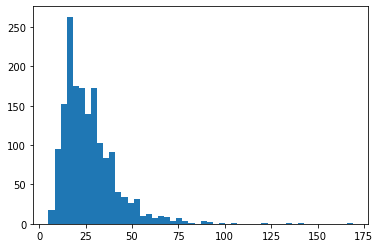

In [8]:
tokens_lens = [len(tokenizer.encode(el)) for el in texts]
plt.hist(tokens_lens, bins=50);

In [9]:
inference()

100%|██████████| 9/9 [00:01<00:00,  6.55it/s]


Score: 0.8108108108108107, loss: 0.24248038232326508


  0%|          | 0/10570 [00:00<?, ?it/s]